Ответ на вопрос https://ru.stackoverflow.com/questions/1293488/

Пусть дана точка $P(x_p,y_p,z_p)$ и эллипсоид, у которого известны полуоси и центр, его уравнение: $x^2/a^2+y^2/a^2+z^2/b^2=1$. 

Точка $P$ лежит за пределами эллипсоида в некотором отдалении. Множество касательных к эллипсоиду, проведенных из $P$ образует коническую поверхность. Надо найти общий вид точек касания этого конуса и эллипсоида (понятно, что эти точки будут принадлежать эллипсу, то есть задача по сути сводится к отысканию уравнения эллипса касания конуса и эллипсоида). Можно ли здесь упростить задачу, перейдя к сферическим координатам? Если да, то как действовать дальше? Если нет, то вопрос аналогичный.

In [1]:
import sympy as sp
import sympy.abc as abc
import sympy.vector as spv

$a$ и $b$ - параметры эллипсоида $\frac{x^2}{a^2} + \frac{y^2}{a^2} + \frac{z^2}{b^2}$

In [2]:
a,b = abc.a, abc.b


Три системы координат:
- $A$ - исходная система координат, в которой задан эллипсоид
- $B$ - система координат, в которой эллипсоид превращается в единичную сферу
- $C$ - система координат, в которой эллипсоид превращен в сферу, а точка $P$ находится на оси $Z$

Матрицы:
- $A2B$ переводит координаты из $A$ в $B$, а матрица $B2A$ переводит обратно
- $B2C$ переводит координаты из $B$ в $C$, а матрица $C2B$ переводит обратно


In [3]:
A2B = sp.Matrix([[1/a, 0,   0],
                 [0,   1/a, 0],
                 [0,   0,   1/b]])

In [4]:
B2A = sp.Matrix([[a, 0, 0],
                 [0, a, 0],
                 [0, 0, b]])

Проверка того, что матрицы $A2B$ и $B2A$ обратны

In [5]:
B2A*A2B

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

В системе координат $B$ вектор $OP$ составляет с осью $x$ угол $\phi$, а с осью $\z$ угол $\theta$
![image](phi_theta.png)

Длина вектора $OP$ в этой системе координат равно $R = \sqrt{\frac{x^2}{a^2} + \frac{y^2}{a^2} + \frac{z^2}{b^2}}$, где $x,y,z$ - координаты точки $P$ в исходной системе координат.

Углы $\theta$ и $\phi$ в системе $B$ определяются так:
- $\cos\theta = \frac{z}{bR}$
- $\cos\phi = \frac{x}{aRsin\theta}$
- $\sin\phi = \frac{y}{aRsin\theta}$

In [6]:
phi, theta = abc.phi, abc.theta

Поворот системы координат от $B$ к $C$, в которой точка $P$ окажется на оси $Z$, выполняется в два приёма:
- сначала на угол $\phi$ вокруг оси $Z$. В результате точка $P$ окажется в плоскости $ZOX$
- затем на угол $\theta$ вокруг оси $Y$. В результате точка $P$ окажется на оси $Z$ в новой системе координат.

In [7]:
B2C = spv.BodyOrienter(phi, theta, 0, 'ZYZ').rotation_matrix()
B2C

Matrix([
[cos(phi)*cos(theta), sin(phi)*cos(theta), -sin(theta)],
[          -sin(phi),            cos(phi),           0],
[sin(theta)*cos(phi), sin(phi)*sin(theta),  cos(theta)]])

Матрица обратного преобразования строится в обратном порядке: 
- сначала на угол $-\theta$ вокруг оси $Y$,
- затем на угол $-\phi$ вокруг оси $Z$. 

In [8]:
C2B = spv.BodyOrienter(-theta, -phi, 0, 'YZX').rotation_matrix()
C2B

Matrix([
[cos(phi)*cos(theta), -sin(phi), sin(theta)*cos(phi)],
[sin(phi)*cos(theta),  cos(phi), sin(phi)*sin(theta)],
[        -sin(theta),         0,          cos(theta)]])

Проверка того, что матрицы $B2C$ и $C2B$ обратны друг другу

In [9]:
sp.trigsimp(C2B*B2C) # упрощение тригонометрических выражений

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [10]:
R = abc.R

Точка $P$ в системе координат $C$ находится на оси $Z$ на расстоянии $R$ от начала координат

In [11]:
P_C = sp.Matrix([[0],[0],[R]])

Координаты точки $P$ в исходной системе координат

In [12]:
P_A = B2A*C2B*P_C

In [13]:
P_A

Matrix([
[R*a*sin(theta)*cos(phi)],
[R*a*sin(phi)*sin(theta)],
[         R*b*cos(theta)]])

В системе координат $C$ эллипс представлен единичной сферой. Касательные из точки $P$ в этой системе координат образуют круг радиусом $r$ в плоскости, отстоящей на расстояние $h$ от начала координат.

Подробнее о касательной к кругу можно прочитать здесь: https://www.wikiwand.com/en/Tangent_lines_to_circles

In [14]:
r = sp.sqrt(1 - 1/(R*R))
r

sqrt(1 - 1/R**2)

In [15]:
h = sp.sqrt(1 - r*r)

In [16]:
h

sqrt(R**(-2))

Построим уравнение касательного круга в параметрическом виде, как вращение точки вокруг оси $Z$ с круговой частотой $\omega$

In [17]:
omega = abc.omega
t = abc.t

In [18]:
base = sp.Matrix([[0],[0], [1/R]]) # центр круга
e1 = sp.Matrix([[r],[0],[0]]) # проекция точки на ось x
e2 = sp.Matrix([[0], [r],[0]]) # проекция точки на ось y

Радиус-вектор точек, в которых конус касается эллипсоида, в системе координат $C$

In [19]:
tangent = base + e1*sp.cos(t) + e2*sp.sin(t)
tangent

Matrix([
[sqrt(1 - 1/R**2)*cos(t)],
[sqrt(1 - 1/R**2)*sin(t)],
[                    1/R]])

Проверка: касательная плоскость к единичной сфере в точке $(x_0, y_0, z_0)$ задаётся уравнением $2x_0(x-x_0) + 2y_0(y-y_0) + 2z_0(z-z_0) = 0$

Подставим в это уравнение в качестве $(x_0, y_0, z_0)$ координаты из $tangent$, а вместо $(x, y, z)$ координаты точки $P = (0, 0, R)$

Для справки уравнение касательной плоскости к поверхности, заданной уравнением $F(x,y,z)=0$ в точке $(x_0, y_0, z_0)$:

$F'_x(x_0)\cdot(x-x_0) + F'_y(y_0)\cdot(y-y_0) + F'_z(z_0)\cdot(z-z_0) = 0$

In [20]:
_t = tangent
_u = _t[0]*(-_t[0]) + _t[1]*(-_t[1]) + _t[2]*(R-_t[2])
sp.trigsimp(_u)

0

Радиус вектор точек , в которых конус касается эллипсоида, в системе координат $A$

In [21]:
tangent_A = B2A*C2B*tangent

In [22]:
tangent_A

Matrix([
[-a*sqrt(1 - 1/R**2)*sin(phi)*sin(t) + a*sqrt(1 - 1/R**2)*cos(phi)*cos(t)*cos(theta) + a*sin(theta)*cos(phi)/R],
[ a*sqrt(1 - 1/R**2)*sin(phi)*cos(t)*cos(theta) + a*sqrt(1 - 1/R**2)*sin(t)*cos(phi) + a*sin(phi)*sin(theta)/R],
[                                                       -b*sqrt(1 - 1/R**2)*sin(theta)*cos(t) + b*cos(theta)/R]])

Проверим, что найденные точки лежат на эллипсоиде

In [23]:
_t = tangent_A
_u = _t[0]**2/a**2 + _t[1]**2/a**2 + _t[2]**2/b**2
sp.trigsimp(_u)

1

Проверка 2: касательная плоскость к эллипсоиду в точке $(x_0, y_0, z_0)$ задаётся уравнением $2x_0/a^2(x-x_0) + 2y_0/a^2(y-y_0) + 2z_0/b^2(z-z_0) = 0$

In [24]:
_t = tangent_A
_p = P_A
_u = _t[0]/a**2*(_p[0]-_t[0]) + _t[1]/a**2*(_p[1]-_t[1]) + _t[2]/b**2*(_p[2]-_t[2])
sp.trigsimp(_u)

0

Подставим формулы для $R$ и углов $\theta$ и $\phi$ в выражение для точек касания конуса к эллипсу

In [25]:
x,y,z = sp.symbols("x y z")

In [26]:
t_a = tangent_A.subs({                 
                sp.cos(phi) : x/a/sp.sin(theta)/R,
                sp.sin(phi) : y/a/sp.sin(theta)/R
               })                                        \
    .subs({sp.sin(theta) : sp.sqrt(1-sp.cos(theta)**2)}) \
    .subs({sp.cos(theta) : z/b/R})                       \
    .subs({R:sp.sqrt((x/a)**2 + (y/a)**2 + (z/b)**2)})
t_a

Matrix([
[x/(z**2/b**2 + x**2/a**2 + y**2/a**2) - y*sqrt(1 - 1/(z**2/b**2 + x**2/a**2 + y**2/a**2))*sin(t)/(sqrt(1 - z**2/(b**2*(z**2/b**2 + x**2/a**2 + y**2/a**2)))*sqrt(z**2/b**2 + x**2/a**2 + y**2/a**2)) + x*z*sqrt(1 - 1/(z**2/b**2 + x**2/a**2 + y**2/a**2))*cos(t)/(b*sqrt(1 - z**2/(b**2*(z**2/b**2 + x**2/a**2 + y**2/a**2)))*(z**2/b**2 + x**2/a**2 + y**2/a**2))],
[x*sqrt(1 - 1/(z**2/b**2 + x**2/a**2 + y**2/a**2))*sin(t)/(sqrt(1 - z**2/(b**2*(z**2/b**2 + x**2/a**2 + y**2/a**2)))*sqrt(z**2/b**2 + x**2/a**2 + y**2/a**2)) + y/(z**2/b**2 + x**2/a**2 + y**2/a**2) + y*z*sqrt(1 - 1/(z**2/b**2 + x**2/a**2 + y**2/a**2))*cos(t)/(b*sqrt(1 - z**2/(b**2*(z**2/b**2 + x**2/a**2 + y**2/a**2)))*(z**2/b**2 + x**2/a**2 + y**2/a**2))],
[                                                                                                                                                                                                        -b*sqrt(1 - z**2/(b**2*(z**2/b**2 + x**2/a**2 + y**2/a**2)))*sqrt(1 - 1/

In [27]:
center = B2A*C2B*base
v1 = B2A*C2B*e1
v2 = B2A*C2B*e2

In [28]:
center

Matrix([
[a*sin(theta)*cos(phi)/R],
[a*sin(phi)*sin(theta)/R],
[         b*cos(theta)/R]])

In [29]:
v1

Matrix([
[a*sqrt(1 - 1/R**2)*cos(phi)*cos(theta)],
[a*sqrt(1 - 1/R**2)*sin(phi)*cos(theta)],
[        -b*sqrt(1 - 1/R**2)*sin(theta)]])

In [30]:
v2

Matrix([
[-a*sqrt(1 - 1/R**2)*sin(phi)],
[ a*sqrt(1 - 1/R**2)*cos(phi)],
[                           0]])

In [31]:
import numpy as np

In [32]:
def tangent_cone(a,b, P):
    """
    Возвращает три вектора `c,v1,v2`, определяющие эллипс, по точкам которого эллипсоид касается конус с вершиной `P`.
    
    Точки r_tan эллипса вычисляются так:
    ```
    c, v1, v2 = tangent_cone(a,b, P)
    t = np.linspace(0, 2*np.pi, 100)
    r_tan = c.reshape(3,1) + v1.reshape(3,1)*np.cos(t) + v2.reshape(3,1)*np.sin(t)
    ```
    В этом случае r_tan - матрица из 3 строк и 100 столбцов. Первая строка - координата `x` точек, 
    вторая строка - координата `y`, третья строка - координата `z`.
    """
    assert P.ndim == 1
    assert len(P) == 3
    
    x,y,z = P
    R = np.sqrt(x**2/a**2 + y**2/a**2 + z**2/b**2)
    cos_theta = (z/b)/R
    # theta меняется от 0 до pi, поэтому sin(theta) >= 0
    sin_theta = np.sqrt(1 - cos_theta**2)
    
    sin_phi = (y/a)/(sin_theta*R)
    cos_phi = (x/a)/(sin_theta*R)
    
    center = np.array([a*cos_phi*sin_theta/R, a*sin_phi*sin_theta/R, b*cos_theta/R])
    
    r = np.sqrt(1 - 1/R**2)
    v1 = np.array([a*r*cos_phi*cos_theta, a*r*sin_phi*cos_theta, -b*r*sin_theta])
    v2 = np.array([-a*r*sin_phi, a*r*cos_phi, 0])
    
    return center, v1, v2

In [33]:
# Эллипсоид вытянут вдоль Z
a = 1
b = 4

In [34]:
# Вершина конуса на бисектрисе первого квадранта
P = np.array([5,5,5])

In [35]:
c, v1, v2 = tangent_cone(a,b, P)


In [36]:
t = np.linspace(0, 2*np.pi, 100)
r_tan = c.reshape(3,1)+v1.reshape(3,1)*np.cos(t) + v2.reshape(3,1)*np.sin(t)

In [37]:
el_X, el_Y = np.meshgrid(np.linspace(-a, a, 200), np.linspace(-a, a, 200))

In [38]:
el_Z = b*np.sqrt(1 - el_X**2/a**2 - el_Y**2/a**2, )


<ipython-input-38-80c6e10389cd>:1: RuntimeWarning: invalid value encountered in sqrt
  el_Z = b*np.sqrt(1 - el_X**2/a**2 - el_Y**2/a**2, )


In [39]:
import matplotlib.pyplot as plt

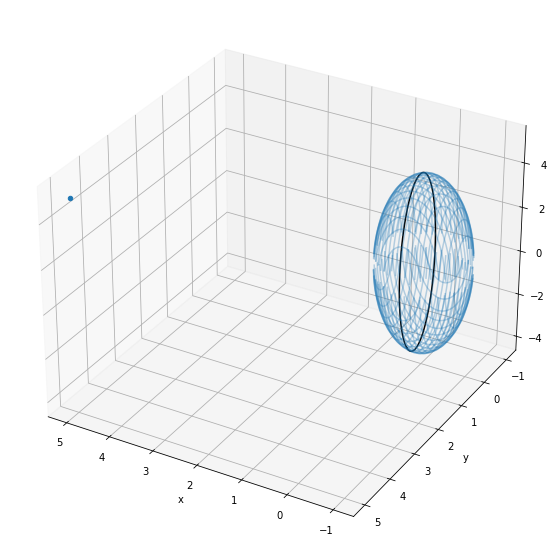

In [40]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(30, 120)

ax.plot_wireframe(el_X, el_Y, el_Z, cstride=10, rstride = 10, alpha=0.3)
ax.plot_wireframe(el_X, el_Y, -el_Z, cstride=10, rstride = 10, alpha=0.3)
ax.plot(r_tan[0], r_tan[1], r_tan[2], color="black")
ax.scatter(*P)
